**Project understanding**

The main objective of this study is to analyze the sentiment (positive, negative, neutral) of BBC news about feminism in Latin America. We seek to understand how the media, specifically the BBC, represents feminism in these regions and how this may reflect the perception and social dynamics of feminism in Latin American society.


**Data understanding**

Data collection was done through web scrpaing.

In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import re
import unicodedata
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from scipy.spatial.distance import cosine
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import LinearSegmentedColormap
from PIL import Image
import numpy as np



In [2]:
df = pd.read_csv('News_data.csv')
df

,Title,Author,Text
0,"""Si quieres ser más feminista e ir en contra d...",Article information Aut...,"\nEscriba en la pizarra cien veces, “yo no est..."
1,“Incluso en la soledad y oscuridad de la mater...,Article information Aut...,"\nCuando Tania Tagle (Ciudad de México, 1986) ..."
2,"Claudia Piñeiro: ""En el lenguaje inclusivo los...",Author not found.,"\nLos avances del feminismo, el lenguaje inclu..."
3,"""¿Cómo 5 chicos se ponen de acuerdo para matar...",Author not found.,\n¿Cómo llega un hombre a violar en grupo? ¿A ...
4,"“Esta es una sociedad joven y sexual, si no er...",Author not found.,"\nEn la canción ""Antidiva"", que habla del show..."
5,"Revolución mexicana: quién fue Adela Velarde, ...",Author not found.,\nToda revolución necesita un héroe y una musa...
6,"""Solo sí es sí"": por qué muchos agresores sexu...",Author not found.,"\nLleva en vigor apenas un mes, pero la polémi..."
7,"""Solo sí es sí"": en qué consiste la nueva y po...",Author not found.,\nSe llama Ley de Garantía Integral de Liberta...
8,"Ile, exmiembro de Calle 13: ""Nos pasa mucho a ...",Author not found.,"\nPara 2005, cuando Ileana Cabra (Ile) tenía 1..."
9,Cómo están cambiando las ciudades para ser más...,Author not found.,\n¿Qué mujer no ha sentido miedo volviendo a c...


In [3]:
#Author is an irrelevant data for our analysis, that is why it is eliminated.
df = df.drop('Author', axis=1)
df


,Title,Text
0,"""Si quieres ser más feminista e ir en contra d...","\nEscriba en la pizarra cien veces, “yo no est..."
1,“Incluso en la soledad y oscuridad de la mater...,"\nCuando Tania Tagle (Ciudad de México, 1986) ..."
2,"Claudia Piñeiro: ""En el lenguaje inclusivo los...","\nLos avances del feminismo, el lenguaje inclu..."
3,"""¿Cómo 5 chicos se ponen de acuerdo para matar...",\n¿Cómo llega un hombre a violar en grupo? ¿A ...
4,"“Esta es una sociedad joven y sexual, si no er...","\nEn la canción ""Antidiva"", que habla del show..."
5,"Revolución mexicana: quién fue Adela Velarde, ...",\nToda revolución necesita un héroe y una musa...
6,"""Solo sí es sí"": por qué muchos agresores sexu...","\nLleva en vigor apenas un mes, pero la polémi..."
7,"""Solo sí es sí"": en qué consiste la nueva y po...",\nSe llama Ley de Garantía Integral de Liberta...
8,"Ile, exmiembro de Calle 13: ""Nos pasa mucho a ...","\nPara 2005, cuando Ileana Cabra (Ile) tenía 1..."
9,Cómo están cambiando las ciudades para ser más...,\n¿Qué mujer no ha sentido miedo volviendo a c...


In [4]:
# "Num" is added where the news number appears, so that later on when analyzing the information and visualizing it, it will be easier because the title of the news is long.
num_rows = len(df)
new_values = ['New ' + str(i) for i in range(1, num_rows + 1)]

df['Num'] = new_values
df

,Title,Text,Num
0,"""Si quieres ser más feminista e ir en contra d...","\nEscriba en la pizarra cien veces, “yo no est...",New 1
1,“Incluso en la soledad y oscuridad de la mater...,"\nCuando Tania Tagle (Ciudad de México, 1986) ...",New 2
2,"Claudia Piñeiro: ""En el lenguaje inclusivo los...","\nLos avances del feminismo, el lenguaje inclu...",New 3
3,"""¿Cómo 5 chicos se ponen de acuerdo para matar...",\n¿Cómo llega un hombre a violar en grupo? ¿A ...,New 4
4,"“Esta es una sociedad joven y sexual, si no er...","\nEn la canción ""Antidiva"", que habla del show...",New 5
5,"Revolución mexicana: quién fue Adela Velarde, ...",\nToda revolución necesita un héroe y una musa...,New 6
6,"""Solo sí es sí"": por qué muchos agresores sexu...","\nLleva en vigor apenas un mes, pero la polémi...",New 7
7,"""Solo sí es sí"": en qué consiste la nueva y po...",\nSe llama Ley de Garantía Integral de Liberta...,New 8
8,"Ile, exmiembro de Calle 13: ""Nos pasa mucho a ...","\nPara 2005, cuando Ileana Cabra (Ile) tenía 1...",New 9
9,Cómo están cambiando las ciudades para ser más...,\n¿Qué mujer no ha sentido miedo volviendo a c...,New 10


In [5]:
# Convert the 'Text' column of the dataframe 'df' to a list
Text = df['Text'].tolist()

# Initialize a CountVectorizer object
vectorizer = CountVectorizer()

# Transform the text data into a term-document matrix
matriz_td = vectorizer.fit_transform(Text)

# Retrieve the feature names (i.e., the vocabulary of the text data)
vocabulary = vectorizer.get_feature_names_out()

# Convert the term-document matrix to Compressed Sparse Row (CSR) format
sparse_matrix = matriz_td.tocsr()

# Convert the CSR matrix to a regular dense array
data = sparse_matrix.toarray()

# Create a new DataFrame from the dense array with vocabulary as columns
# and custom index labels for each text/document
dff = pd.DataFrame(data, columns=vocabulary, index=[f"New {i + 1}" for i in range(len(Text))])

# Display the created DataFrame
dff



,000,10,100,11,12,13,14,141,15,16,...,íntimos,ómo,óptima,órgano,óvulos,última,último,últimos,única,único
New 1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
New 2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
New 3,0,2,0,0,0,0,0,0,2,0,...,0,0,0,0,0,1,1,3,0,0
New 4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,4
New 5,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New 6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,1,0
New 7,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
New 8,1,0,0,0,0,0,2,1,1,0,...,0,0,0,1,0,0,1,0,0,0
New 9,0,1,0,1,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
New 10,2,2,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Data preparation**

In [6]:
def clean_tokenize(text):
    # Convert all text to lowercase
    new_text = text.lower()
    
    # Removal of accents and special characters
    new_text = unicodedata.normalize('NFKD', new_text).encode('ascii', 'ignore').decode('ascii')

    # Removal of web pages (words that start with "http")
    new_text = re.sub('http\S+', ' ', new_text)

    # Removal of punctuation marks
    regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
    new_text = re.sub(regex , ' ', new_text)

    # Removal of numbers
    new_text = re.sub("\d+", ' ', new_text)

    # Removal of multiple white spaces
    new_text = re.sub("\\s+", ' ', new_text)

    # Tokenization into individual words
    new_text = new_text.split(sep = ' ')

    # List of prepositions, articles and stopwords in Spanish
    stop_words_es = set(stopwords.words('spanish'))
    prepositions_articles = set(['a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en', 'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so', 'sobre', 'tras', 'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo'])

    # Removal of prepositions, articles, stopwords and tokens with length < 2
    new_text = [token for token in new_text if token not in prepositions_articles and token not in stop_words_es and len(token) > 1]
    
    return new_text

# Example of use
test = "Cleaning a text is fundamental in data preparation for analysis"
print(test)
print(clean_tokenize(text=test))



Cleaning a text is fundamental in data preparation for analysis
['cleaning', 'text', 'is', 'fundamental', 'in', 'data', 'preparation', 'for', 'analysis']


In [7]:
# stores the tokenized text in a new column
df['Tokenized_text'] = df['Text'].apply(lambda x: clean_tokenize(x))
df[['Text', 'Tokenized_text']].head()

,Text,Tokenized_text
0,"\nEscriba en la pizarra cien veces, “yo no est...","[escriba, pizarra, cien, veces, encima, mujere..."
1,"\nCuando Tania Tagle (Ciudad de México, 1986) ...","[tania, tagle, ciudad, mexico, empezo, escribi..."
2,"\nLos avances del feminismo, el lenguaje inclu...","[avances, feminismo, lenguaje, inclusivo, abor..."
3,\n¿Cómo llega un hombre a violar en grupo? ¿A ...,"[llega, hombre, violar, grupo, matar, grupo, p..."
4,"\nEn la canción ""Antidiva"", que habla del show...","[cancion, antidiva, habla, showbussiness, andr..."


In [8]:
# Explode the 'Tokenized_text' column into individual rows for each token
news_tidy = df.explode(column='Tokenized_text')

# Remove the original 'Text' column, as it's no longer needed
news_tidy = news_tidy.drop(columns='Text')

# Rename the 'Tokenized_text' column to 'Token' for clarity
news_tidy = news_tidy.rename(columns={'Tokenized_text':'Token'})

# Display the first three rows of the modified DataFrame
news_tidy.head(3)


,Title,Num,Token
0,"""Si quieres ser más feminista e ir en contra d...",New 1,escriba
0,"""Si quieres ser más feminista e ir en contra d...",New 1,pizarra
0,"""Si quieres ser más feminista e ir en contra d...",New 1,cien


In [9]:
print('--------------------------')
print('Total words per new')
print('--------------------------')
news_tidy.groupby(by='Num')['Token'].count()

--------------------------
Total words per new
--------------------------


Num
New 1      964
New 10     920
New 11    1316
New 12    1048
New 13    1214
New 14     132
New 15     444
New 16     683
New 17     530
New 18    1092
New 2      944
New 3      960
New 4     1061
New 5     1059
New 6      675
New 7      418
New 8      686
New 9      599
Name: Token, dtype: int64

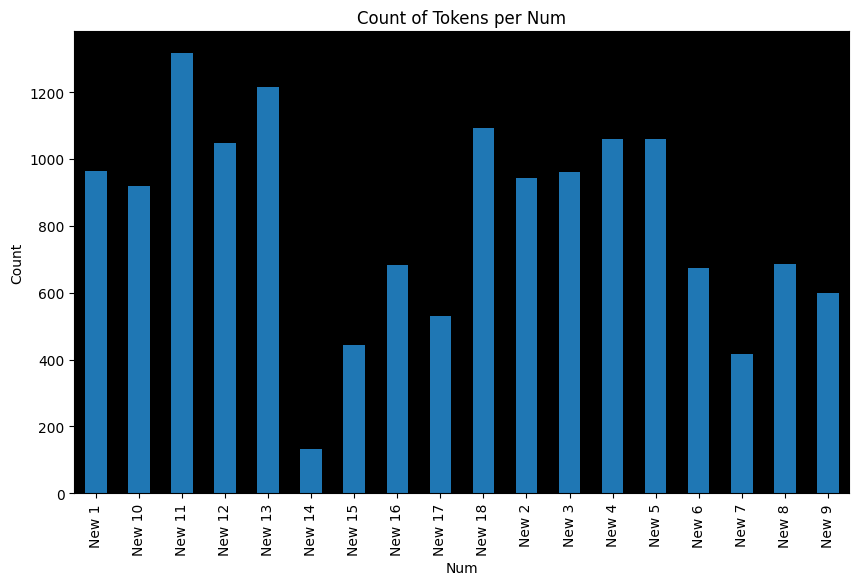

In [10]:
counts = news_tidy.groupby(by='Num')['Token'].count()

# Setting the size of the plot
plt.figure(figsize=(10,6))
plt.gca().set_facecolor('black')

# Creating the bar plot
counts.plot(kind='bar')

# Adding titles and labels
plt.xlabel('Num')
plt.ylabel('Count')
plt.title('Count of Tokens per Num')

# Displaying the plot
plt.show()


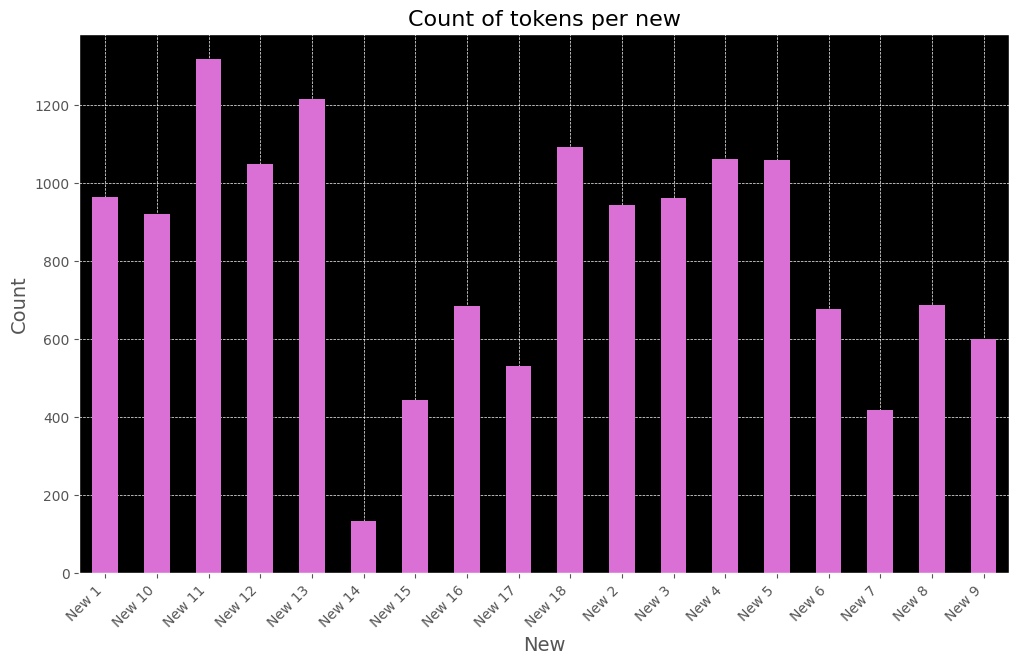

In [11]:
plt.style.use('ggplot')  # Using the 'ggplot' style for plotting

plt.figure(figsize=(12, 7))  # Setting a larger figure size for better visualization

# Creating a bar chart with custom color
counts.plot(kind='bar', color='orchid')
plt.gca().set_facecolor('black')


# Adding titles and labels with a larger font size
plt.xlabel('New', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of tokens per new', fontsize=16)

# Improving the x-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate labels for easier reading

# Adding a grid in the background to make reading values easier
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Displaying the plot
plt.show()


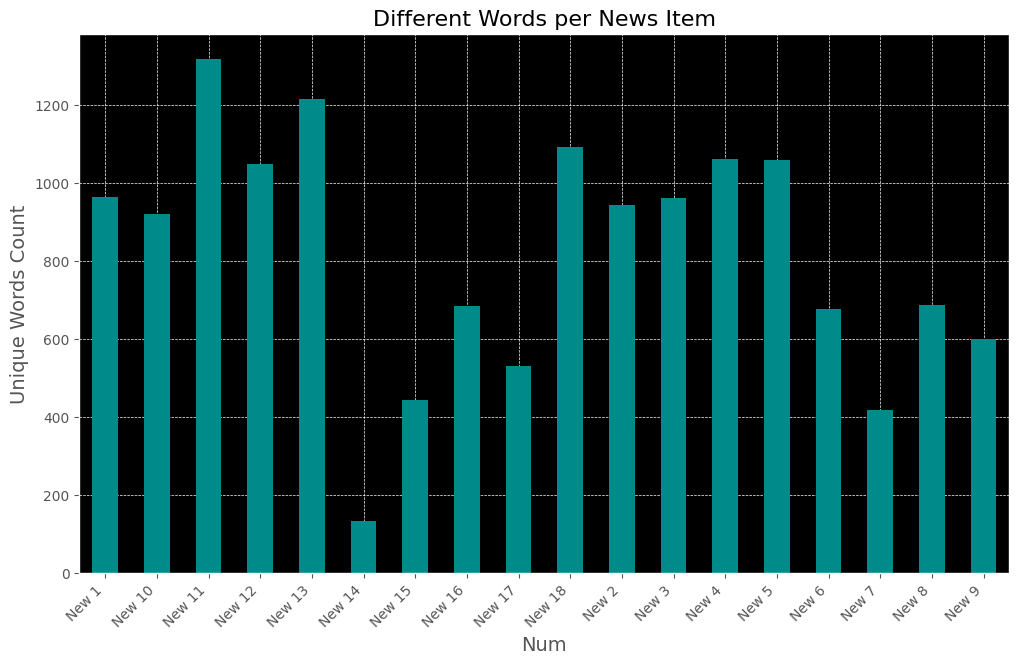

In [12]:

# Use 'ggplot' style for aesthetic purposes
plt.style.use('ggplot')

# Group by 'Num' and count unique 'Token' values
unique_counts = news_tidy.groupby(by='Num')['Token'].nunique()

# Set the figure size and background color
plt.figure(figsize=(12, 7), facecolor='white')

counts.plot(kind='bar', color='darkcyan')


# Set the color of the axes background
plt.gca().set_facecolor('black')

# Add titles and labels with increased font size
plt.xlabel('Num', fontsize=14)
plt.ylabel('Unique Words Count', fontsize=14)
plt.title('Different Words per News Item', fontsize=16)

# Adjust x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a grid for easier reading of counts
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


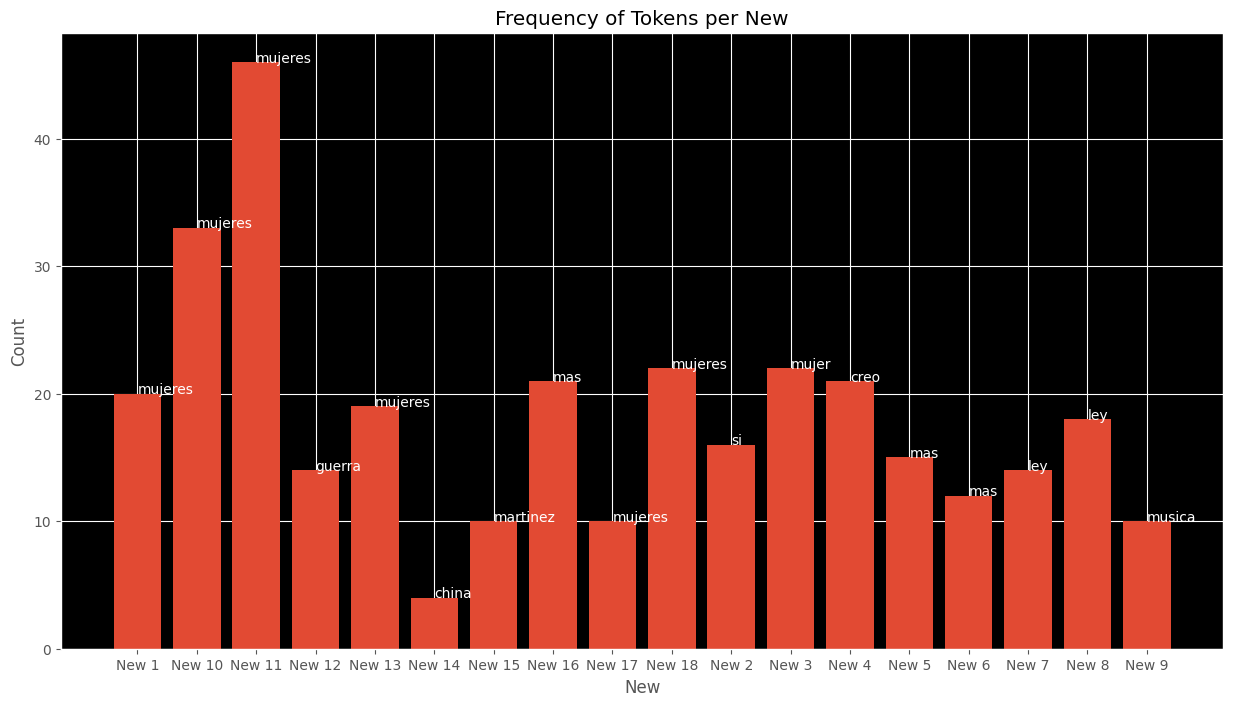

In [13]:
result = news_tidy.groupby(['Num','Token'])['Token'] \
          .count() \
          .reset_index(name='count') \
          .groupby('Num') \
          .apply(lambda x: x.sort_values('count', ascending=False).head(1)) \
          .reset_index(drop=True)


# Setting the size of the plot
plt.figure(figsize=(15,8), )

# Creating the bar plot
plt.bar(result['Num'], result['count'])

plt.gca().set_facecolor('black')


# Adding titles and labels
plt.xlabel('New')
plt.ylabel('Count')
plt.title('Frequency of Tokens per New')

# Adding token labels on the bars
for index, value in enumerate(result['count']):
    plt.text(index, value, str(result['Token'].iloc[index]), color="white")

# Displaying the plot
plt.show()


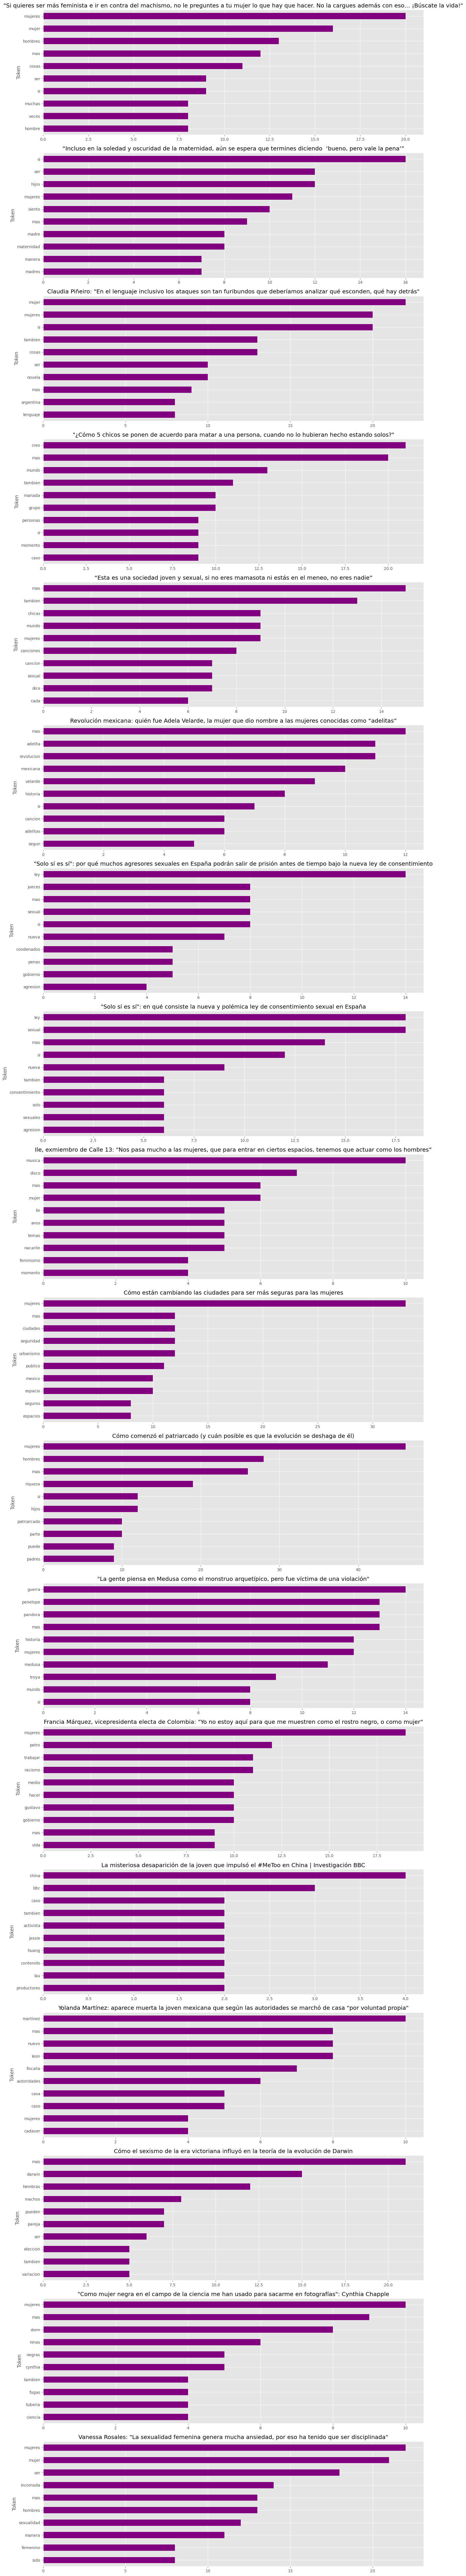

In [14]:
fig, axs = plt.subplots(nrows=18, ncols=1,figsize=(15, 90))
for i, author in enumerate(news_tidy.Title.unique()):
    df_temp = news_tidy[news_tidy.Title == author]
    counts  = df_temp['Token'].value_counts(ascending=False).head(10)
    counts.plot(kind='barh', color='purple', ax=axs[i])
    axs[i].invert_yaxis()
    axs[i].set_title(author)

fig.tight_layout()

Correlation between news

In [15]:
# Group by 'Num' and 'token', and count the occurrences of each token.
news_pivot = news_tidy.groupby(["Num", "Token"])["Token"] \
                .agg(["count"]).reset_index() \
                .pivot(index="Token", columns="Num", values="count") # Pivot the table to have tokens as rows and 'Num' as columns.


# Remove the column index name for clarity.
news_pivot.columns.name = None


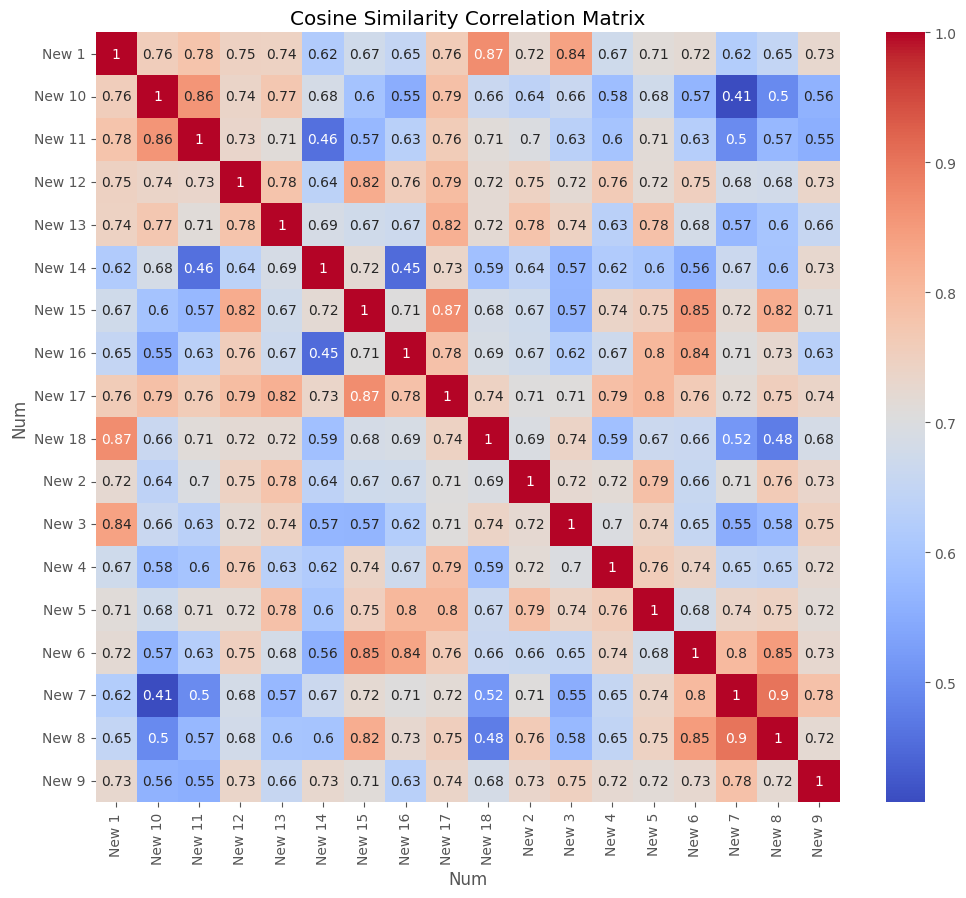

In [16]:
# Define a function to calculate cosine similarity between two vectors.
def similitud_coseno(a, b):
    distancia = cosine(a, b)  # Compute cosine distance.
    return 1 - distancia      # Convert distance to similarity.

# Calculate the correlation matrix using the custom cosine similarity function.
correlation_matrix = news_pivot.corr(method=similitud_coseno)

# Set up the plot dimensions.
plt.figure(figsize=(12, 10))
# Create a heatmap of the correlation matrix.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add a title and labels to the heatmap.
plt.title('Cosine Similarity Correlation Matrix')
plt.xlabel('Num')
plt.ylabel('Num')

# Display the plot.
plt.show()


**Modeling**

In [23]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('es_core_news_sm')
nlp.add_pipe('spacytextblob')

# Create columns for polarity and subjectivity
df['Polarity'] = 0.0
df['Subjectivity'] = 0.0
df['Sentiment']= ''

def classify_sentiment(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

for index, row in df.iterrows():
    doc = nlp(row['Text'])  
    df.at[index, 'Polarity'] = doc._.polarity  
    df.at[index, 'Subjectivity'] = doc._.subjectivity
    df.at[index, 'Sentiment'] = classify_sentiment(doc._.polarity)


    

In [24]:
df

,Title,Text,Num,Tokenized_text,Polarity,Subjectivity,Sentiment
0,"""Si quieres ser más feminista e ir en contra d...","\nEscriba en la pizarra cien veces, “yo no est...",New 1,"[escriba, pizarra, cien, veces, encima, mujere...",0.028352,0.374545,Neutral
1,“Incluso en la soledad y oscuridad de la mater...,"\nCuando Tania Tagle (Ciudad de México, 1986) ...",New 2,"[tania, tagle, ciudad, mexico, empezo, escribi...",0.144444,0.313889,Positive
2,"Claudia Piñeiro: ""En el lenguaje inclusivo los...","\nLos avances del feminismo, el lenguaje inclu...",New 3,"[avances, feminismo, lenguaje, inclusivo, abor...",-0.052778,0.288889,Negative
3,"""¿Cómo 5 chicos se ponen de acuerdo para matar...",\n¿Cómo llega un hombre a violar en grupo? ¿A ...,New 4,"[llega, hombre, violar, grupo, matar, grupo, p...",0.193519,0.401852,Positive
4,"“Esta es una sociedad joven y sexual, si no er...","\nEn la canción ""Antidiva"", que habla del show...",New 5,"[cancion, antidiva, habla, showbussiness, andr...",0.152328,0.767647,Positive
5,"Revolución mexicana: quién fue Adela Velarde, ...",\nToda revolución necesita un héroe y una musa...,New 6,"[toda, revolucion, necesita, heroe, musa, adel...",0.212500,0.650000,Positive
6,"""Solo sí es sí"": por qué muchos agresores sexu...","\nLleva en vigor apenas un mes, pero la polémi...",New 7,"[lleva, vigor, apenas, mes, polemica, abandona...",0.350000,0.589744,Positive
7,"""Solo sí es sí"": en qué consiste la nueva y po...",\nSe llama Ley de Garantía Integral de Liberta...,New 8,"[llama, ley, garantia, integral, libertad, sex...",0.387821,0.656410,Positive
8,"Ile, exmiembro de Calle 13: ""Nos pasa mucho a ...","\nPara 2005, cuando Ileana Cabra (Ile) tenía 1...",New 9,"[ileana, cabra, ile, tenia, anos, hermanos, re...",0.013889,0.144444,Neutral
9,Cómo están cambiando las ciudades para ser más...,\n¿Qué mujer no ha sentido miedo volviendo a c...,New 10,"[mujer, miedo, volviendo, casa, noche, calle, ...",0.050000,0.450000,Neutral


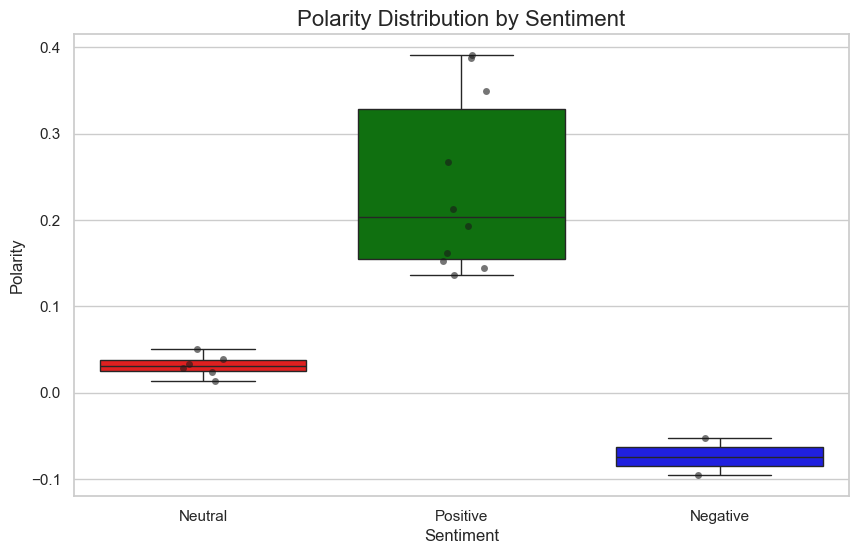

In [27]:
# Set the graph style
sns.set(style="whitegrid")

# Create a figure and an axis
plt.figure(figsize=(10, 6))

# Create a box plot with updated parameters
sns.boxplot(x='Sentiment', y='Polarity', hue='Sentiment', data=df, palette=['red', 'green', 'blue'], legend=False)

# Add a strip plot
sns.stripplot(x='Sentiment', y='Polarity', data=df, color='k', jitter=True, alpha=0.6)

# Enhance visualization
plt.title('Polarity Distribution by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Polarity', fontsize=12)

# Remove the legend as it's redundant
plt.legend([],[], frameon=False)

# Display the plot
plt.show()


**Evaluation**

In [32]:
# Create a DataFrame with true sentiment labels for comparison
df_true = pd.DataFrame({
    'Sentiment_True': ["Neutral", "Positive", "Neutral", "Positive", "Positive",
                        "Positive", "Positive", "Positive", "Neutral", "Neutral",
                        "Neutral", "Positive", "Neutral", "Negative", "Neutral",
                        "Positive", "Negative", "Negative"]
})

In [33]:
# Convert the true sentiment labels into a list
true_labels = df_true['Sentiment_True'].tolist()

# Convert the predicted sentiment labels into a list
model_predictions = df['Sentiment'].tolist()

# Calculate various performance metrics for the sentiment analysis model
# 'accuracy' measures the proportion of correctly predicted instances
accuracy = accuracy_score(true_labels, model_predictions)

# 'f1' is the F1 Score, which balances precision and recall
f1 = f1_score(true_labels, model_predictions, average='weighted')

# 'precision' measures the correctness achieved in positive prediction
precision = precision_score(true_labels, model_predictions, average='weighted')

# 'recall' measures the ability of a model to find all the relevant cases
recall = recall_score(true_labels, model_predictions, average='weighted')

# Print the calculated metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.6666666666666666
F1 Score: 0.651661918328585
Precision: 0.6537037037037037
Recall: 0.6666666666666666


**Deployment**

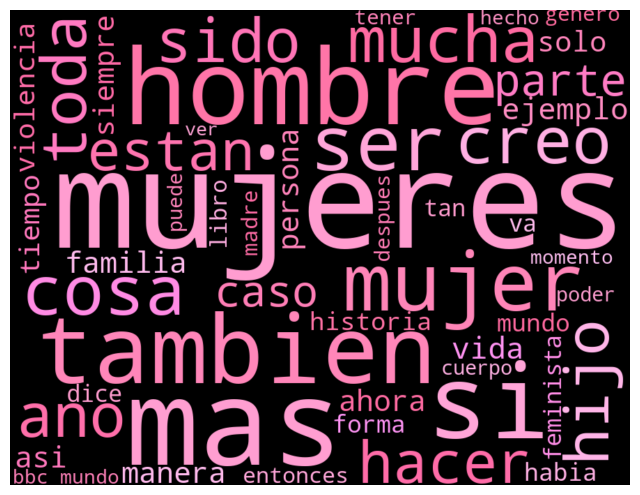

In [36]:
# Combine all tokens from the 'Tokenized_text' column into a single list
all_tokens = [token for tokens_list in df['Tokenized_text'] for token in tokens_list]

# Define a custom pink color palette and create a colormap
colores_rosa = ["#ff66a3", "#ff99cc", "#ffccff", "#ff6699", "#ff99ff"]
cmap_rosa = LinearSegmentedColormap.from_list("tonos_rosa", colores_rosa)

# Load a flower-shaped mask for the word cloud
mask = np.array(Image.open("flor.png"))

# Generate a word cloud with custom settings: shape, colors, and stopwords
wordcloud_tokenized = WordCloud(width = 800, height = 800, 
                                background_color ='black', 
                                stopwords = STOPWORDS,
                                colormap=cmap_rosa,
                                max_words=50,
                                mask=mask, 
                                contour_width=1,
                                contour_color='pink').generate(" ".join(all_tokens))  

# Display the word cloud
plt.figure(figsize = (8, 8)) 
plt.imshow(wordcloud_tokenized, interpolation="bilinear") 
plt.axis("off")
plt.show()


**Conclusions**

My primary goal was to investigate whether media outlets tend to diversify their news in favor of certain narratives. I used web scraping techniques to gather a dataset of 18 news articles due to limitations of the library used.

From this dataset, I identified that 10 news articles were positive, 2 negative, and 6 neutral. These findings indicate a tendency of the BBC to publish news with a predominantly positive tone about feminism in Latin America. Although the sample size is limited, these results provide an interesting perspective on the media representation of feminism in this region.

Regarding the performance of the sentiment analysis model I developed, I achieved an accuracy of 66.67%, an F1 score of 65.17%, a precision of 65.37%, and a recall of 66.66%. These metrics reflect a moderate capability of the model to accurately classify the sentiment of the news articles. It's important to note that, while the results are promising, the accuracy of the model could vary when applied to a more extensive dataset.

The methodology I applied in this study was CRISP-DM, a standardized and highly recognized approach in the field of data mining. This methodology allowed me to tackle the problem in a structured manner, ensuring reproducibility and rigor in the analysis. Understanding the business, preparing the data, modeling, evaluation, and deployment are critical steps I meticulously followed to ensure the validity of my findings.

Finally, this study highlights the importance and practical application of data mining in media analysis. Through sentiment analysis, I gained valuable insights into how media outlets like the BBC represent socially relevant topics. This information is not only crucial for understanding the current media narrative but also for assessing how topics such as feminism are perceived and presented in society.